#Trabajo Final Integrador - Modelo y Simulacion - Universidad de Mendoza - Sede San Rafael - 2024

##Alumno: Lucas A. Galdame Villegas

##Modelo Depredador-Presa

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [101]:
# Parametros Iniciales
semanas = 500
inc_semanas = 1
liebres = 2000
zorros = 10
cap_ter = 1500
tasa_liebres = 0.002 # Tasa de perdida de liebres por encuentro
tasa_zorros = 0.0004 # Tasa de crecimiento de zorros por encuentro
nata_liebres = 0.08
mort_zorros = 0.2

In [102]:
data = pd.DataFrame([])
data = pd.concat([data, pd.DataFrame({'Semana': 0, 'Liebres': int(liebres), 'Zorros': int(zorros)}, index=[0])], ignore_index=True)
data[['Semana','Liebres','Zorros']]

,Semana,Liebres,Zorros
0,0,2000,10


###Simulacion

In [103]:
for semana in range(1, semanas+1):
    cap_act = cap_ter - liebres
    inc_liebres = (1/cap_ter)*cap_act*nata_liebres*liebres
    sob_zorros = mort_zorros*zorros
    caza = zorros*liebres
    liebres = liebres+inc_semanas*(inc_liebres-tasa_liebres*caza)
    zorros = zorros+inc_semanas*(tasa_zorros*caza-sob_zorros)
    data = pd.concat([data, pd.DataFrame({'Semana': int(semana), 'Liebres': int(liebres), 'Zorros': int(zorros)}, index=[0])], ignore_index=True)

data[['Semana','Liebres','Zorros']]

,Semana,Liebres,Zorros
0,0,2000,10
1,1,1906,16
2,2,1804,25
3,3,1684,38
4,4,1539,56
...,...,...,...
496,496,494,25
497,497,496,25
498,498,497,25
499,499,499,25


###Grafico de Poblacion

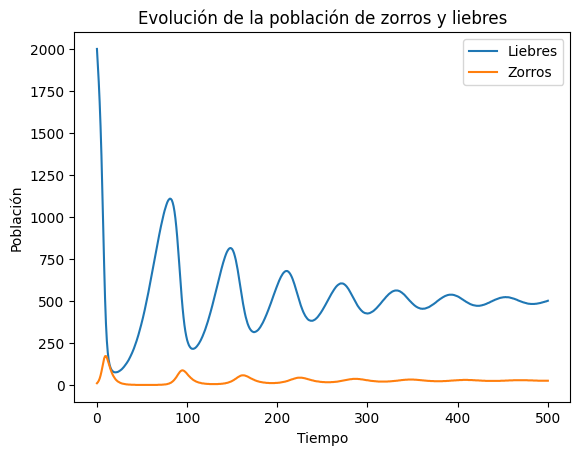

In [104]:
plt.plot(data['Liebres'].tolist(), label="Liebres")
plt.plot(data['Zorros'].tolist(), label="Zorros")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.title("Evolución de la población de zorros y liebres")
plt.legend()
plt.show()

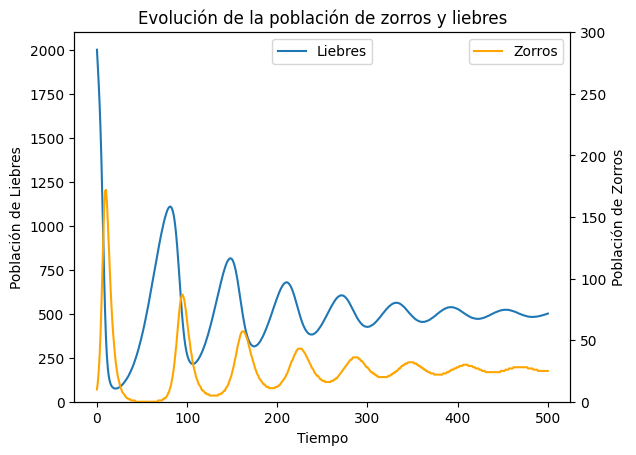

In [105]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_ylim(0,2100)
ax2.set_ylim(0,300)
ax1.plot(data['Liebres'].tolist(), label="Liebres")
ax2.plot(data['Zorros'].tolist(), label="Zorros", color='orange')
ax1.set_ylabel("Población de Liebres")
ax2.set_ylabel("Población de Zorros")
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
ax1.set_xlabel("Tiempo")
plt.title("Evolución de la población de zorros y liebres")
plt.show()

###Diagrama de Fase

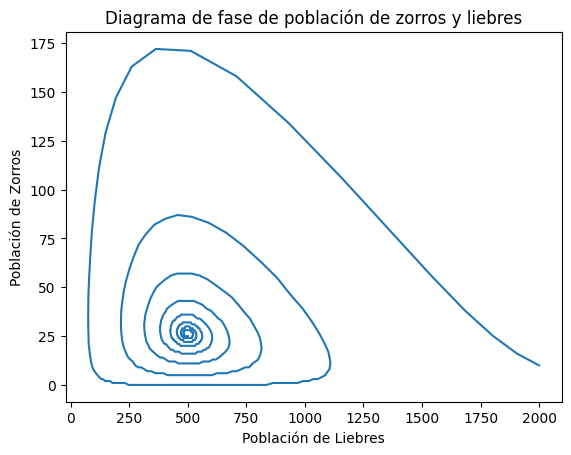

In [106]:
plt.plot(data['Liebres'].tolist(), data['Zorros'].tolist())
plt.xlabel("Población de Liebres")
plt.ylabel("Población de Zorros")
plt.title("Diagrama de fase de población de zorros y liebres")
plt.show()

##Incorporar Factores Adicionales

In [107]:
# Parámetros Iniciales
semanas = 500
inc_semanas = 1
liebres = 2000
zorros = 10
cap_ter = 1500
tasa_liebres = 0.002 # Tasa de perdida de liebres por encuentro
tasa_zorros = 0.0004 # Tasa de crecimiento de zorros por encuentro
nata_liebres = 0.08
mort_zorros = 0.2

In [108]:
# Factores estacionales
amplitud_estacional = 0.05
frecuencia_estacional = 2 * np.pi / 52  # Ciclo anual (52 semanas)

data = pd.DataFrame([])
data = pd.concat([data, pd.DataFrame({'Semana': 0, 'Liebres': int(liebres), 'Zorros': int(zorros)}, index=[0])], ignore_index=True)
data[['Semana','Liebres','Zorros']]

for semana in range(1, semanas+1):
    # Variaciones estacionales
    nata_liebres_estacional = nata_liebres * (1 + amplitud_estacional * np.sin(frecuencia_estacional * semana))
    mort_zorros_estacional = mort_zorros * (1 + amplitud_estacional * np.cos(frecuencia_estacional * semana))

    cap_act = cap_ter - liebres
    inc_liebres = (1/cap_ter) * cap_act * nata_liebres_estacional * liebres
    sob_zorros = mort_zorros_estacional * zorros
    caza = zorros * liebres
    liebres = liebres + inc_semanas * (inc_liebres - tasa_liebres * caza)
    zorros = zorros + inc_semanas * (tasa_zorros * caza - sob_zorros)

    data = pd.concat([data, pd.DataFrame({'Semana': int(semana), 'Liebres': int(liebres), 'Zorros': int(zorros)}, index=[0])], ignore_index=True)

data[['Semana','Liebres','Zorros']]

,Semana,Liebres,Zorros
0,0,2000,10
1,1,1906,15
2,2,1803,24
3,3,1685,37
4,4,1542,54
...,...,...,...
496,496,567,30
497,497,560,31
498,498,551,32
499,499,542,33


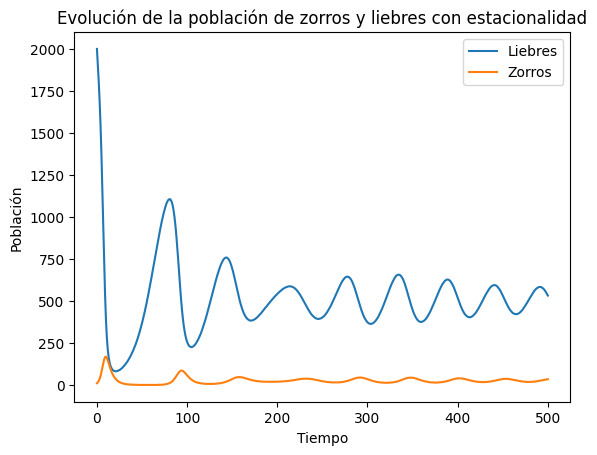

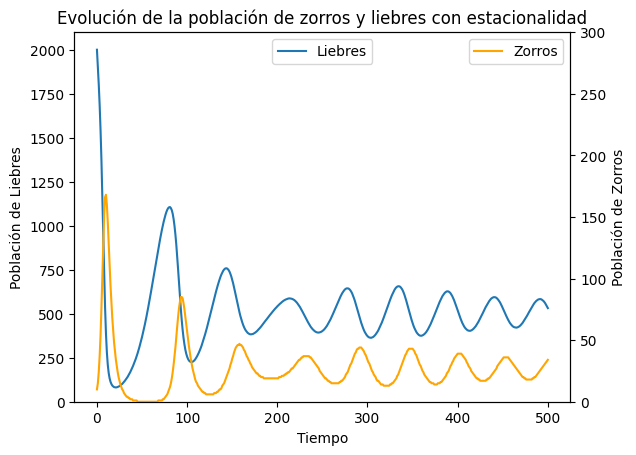

In [109]:
# Gráficos de Resultados
plt.plot(data['Liebres'].tolist(), label="Liebres")
plt.plot(data['Zorros'].tolist(), label="Zorros")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.title("Evolución de la población de zorros y liebres con estacionalidad")
plt.legend()
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_ylim(0,2100)
ax2.set_ylim(0,300)
ax1.plot(data['Liebres'].tolist(), label="Liebres")
ax2.plot(data['Zorros'].tolist(), label="Zorros", color='orange')
ax1.set_ylabel("Población de Liebres")
ax2.set_ylabel("Población de Zorros")
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
ax1.set_xlabel("Tiempo")
plt.title("Evolución de la población de zorros y liebres con estacionalidad")
plt.show()

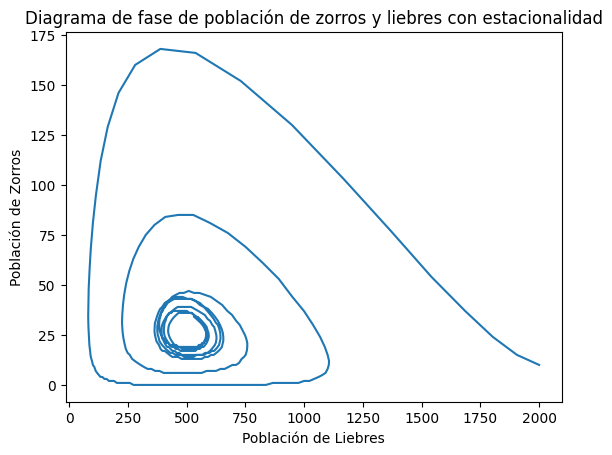

In [110]:
plt.plot(data['Liebres'].tolist(), data['Zorros'].tolist())
plt.xlabel("Población de Liebres")
plt.ylabel("Población de Zorros")
plt.title("Diagrama de fase de población de zorros y liebres con estacionalidad")
plt.show()

##Competencia Intraespecífica e Interespecífica

In [111]:
# Parámetros Iniciales
semanas = 500
inc_semanas = 1
liebres = 2000
zorros = 10
cap_ter = 1500
tasa_liebres = 0.002  # Tasa de pérdida de liebres por encuentro
tasa_zorros = 0.0004  # Tasa de crecimiento de zorros por encuentro
nata_liebres = 0.08
mort_zorros = 0.2
competencia_liebres = 0.00001  # Factor de competencia intraespecífica para liebres
competencia_zorros = 0.00005  # Factor de competencia intraespecífica para zorros

In [112]:
# Factores estacionales
amplitud_estacional = 0.05
frecuencia_estacional = 2 * np.pi / 52  # Ciclo anual (52 semanas)

data = pd.DataFrame([])
data = pd.concat([data, pd.DataFrame({'Semana': 0, 'Liebres': int(liebres), 'Zorros': int(zorros)}, index=[0])], ignore_index=True)
data[['Semana', 'Liebres', 'Zorros']]

for semana in range(1, semanas + 1):
    # Variaciones estacionales
    nata_liebres_estacional = nata_liebres * (1 + amplitud_estacional * np.sin(frecuencia_estacional * semana))
    mort_zorros_estacional = mort_zorros * (1 + amplitud_estacional * np.cos(frecuencia_estacional * semana))

    cap_act = cap_ter - liebres
    inc_liebres = (1 / cap_ter) * cap_act * nata_liebres_estacional * liebres - competencia_liebres * liebres**2
    sob_zorros = mort_zorros_estacional * zorros + competencia_zorros * zorros**2
    caza = zorros * liebres
    liebres = liebres + inc_semanas * (inc_liebres - tasa_liebres * caza)
    zorros = zorros + inc_semanas * (tasa_zorros * caza - sob_zorros)

    data = pd.concat([data, pd.DataFrame({'Semana': int(semana), 'Liebres': int(liebres), 'Zorros': int(zorros)}, index=[0])], ignore_index=True)

data[['Semana', 'Liebres', 'Zorros']]

,Semana,Liebres,Zorros
0,0,2000,10
1,1,1866,15
2,2,1735,24
3,3,1598,36
4,4,1448,51
...,...,...,...
496,496,554,28
497,497,547,29
498,498,539,29
499,499,531,30


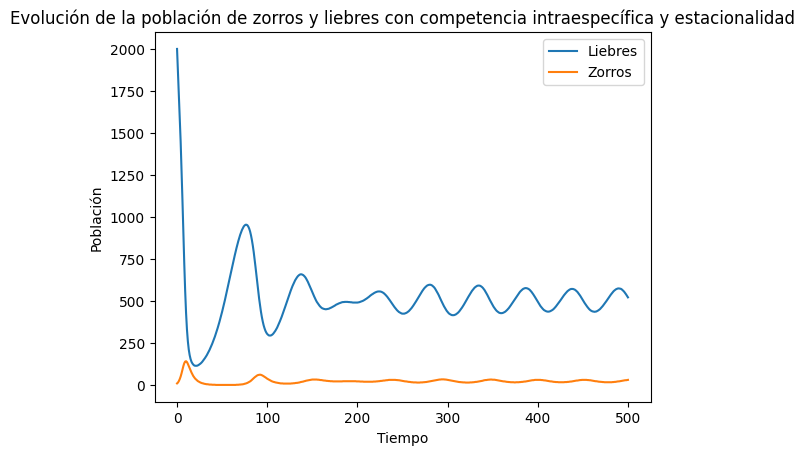

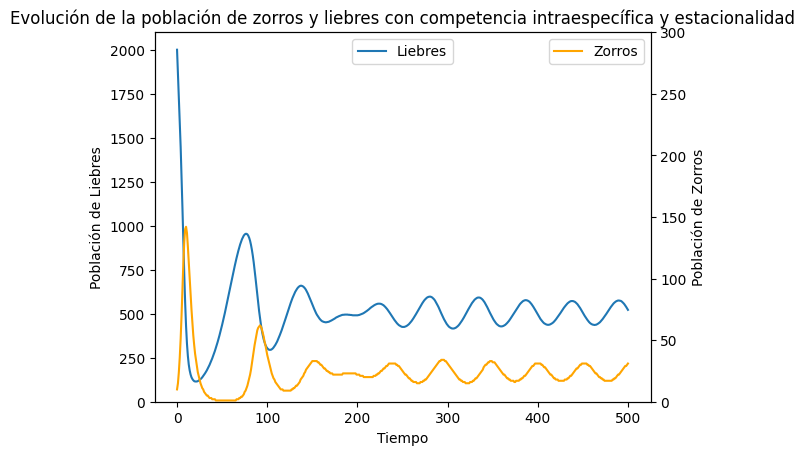

In [113]:
# Gráficos de Resultados
plt.plot(data['Liebres'].tolist(), label="Liebres")
plt.plot(data['Zorros'].tolist(), label="Zorros")
plt.xlabel("Tiempo")
plt.ylabel("Población")
plt.title("Evolución de la población de zorros y liebres con competencia intraespecífica y estacionalidad")
plt.legend()
plt.show()

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_ylim(0, 2100)
ax2.set_ylim(0, 300)
ax1.plot(data['Liebres'].tolist(), label="Liebres")
ax2.plot(data['Zorros'].tolist(), label="Zorros", color='orange')
ax1.set_ylabel("Población de Liebres")
ax2.set_ylabel("Población de Zorros")
ax1.legend(loc='upper center')
ax2.legend(loc='upper right')
ax1.set_xlabel("Tiempo")
plt.title("Evolución de la población de zorros y liebres con competencia intraespecífica y estacionalidad")
plt.show()

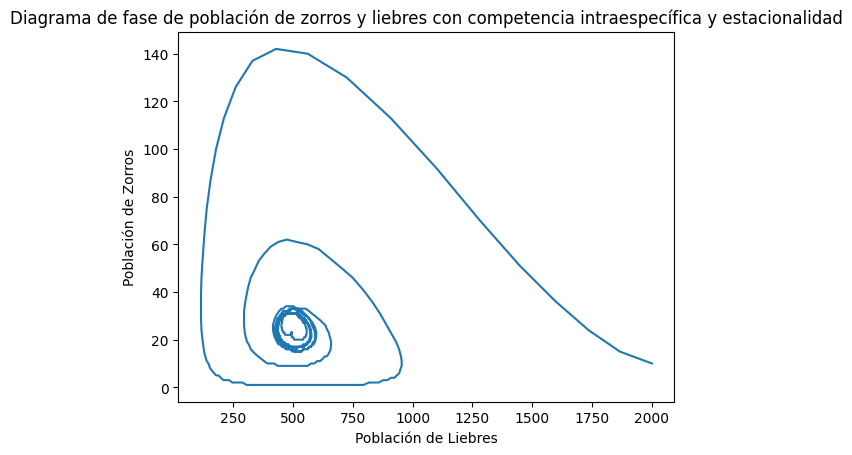

In [114]:
plt.plot(data['Liebres'].tolist(), data['Zorros'].tolist())
plt.xlabel("Población de Liebres")
plt.ylabel("Población de Zorros")
plt.title("Diagrama de fase de población de zorros y liebres con competencia intraespecífica y estacionalidad")
plt.show()

##Modelo Especial

###Configuración Inicial

In [115]:
# Tamaño de la cuadrícula
grid_size = 50

# Parámetros del modelo
initial_liebres_density = 0.4
initial_zorros_density = 0.05
n_steps = 500

# Inicialización de la cuadrícula
grid_liebres = np.random.choice([0, 1], size=(grid_size, grid_size), p=[1-initial_liebres_density, initial_liebres_density])
grid_zorros = np.random.choice([0, 1], size=(grid_size, grid_size), p=[1-initial_zorros_density, initial_zorros_density])

###Definir las Reglas de Actualización

In [116]:
def update(grid_liebres, grid_zorros):
    new_grid_liebres = grid_liebres.copy()
    new_grid_zorros = grid_zorros.copy()

    for i in range(grid_size):
        for j in range(grid_size):
            # Movimiento de liebres
            if grid_liebres[i, j] == 1:
                if np.random.rand() < 0.2:  # Probabilidad de moverse
                    move_to = np.random.choice(['up', 'down', 'left', 'right'])
                    if move_to == 'up' and i > 0:
                        new_grid_liebres[i, j] = 0
                        new_grid_liebres[i-1, j] = 1
                    elif move_to == 'down' and i < grid_size-1:
                        new_grid_liebres[i, j] = 0
                        new_grid_liebres[i+1, j] = 1
                    elif move_to == 'left' and j > 0:
                        new_grid_liebres[i, j] = 0
                        new_grid_liebres[i, j-1] = 1
                    elif move_to == 'right' and j < grid_size-1:
                        new_grid_liebres[i, j] = 0
                        new_grid_liebres[i, j+1] = 1

            # Movimiento de zorros
            if grid_zorros[i, j] == 1:
                if np.random.rand() < 0.3:  # Probabilidad de moverse
                    move_to = np.random.choice(['up', 'down', 'left', 'right'])
                    if move_to == 'up' and i > 0:
                        new_grid_zorros[i, j] = 0
                        new_grid_zorros[i-1, j] = 1
                    elif move_to == 'down' and i < grid_size-1:
                        new_grid_zorros[i, j] = 0
                        new_grid_zorros[i+1, j] = 1
                    elif move_to == 'left' and j > 0:
                        new_grid_zorros[i, j] = 0
                        new_grid_zorros[i, j-1] = 1
                    elif move_to == 'right' and j < grid_size-1:
                        new_grid_zorros[i, j] = 0
                        new_grid_zorros[i, j+1] = 1

            # Reproducción de liebres
            if grid_liebres[i, j] == 1 and np.random.rand() < 0.1:
                for di, dj in [(-1, 0), (1, 0), (0, -1), (0, 1)]:
                    ni, nj = i + di, j + dj
                    if 0 <= ni < grid_size and 0 <= nj < grid_size and new_grid_liebres[ni, nj] == 0:
                        new_grid_liebres[ni, nj] = 1
                        break

            # Zorros comen liebres
            if grid_zorros[i, j] == 1 and grid_liebres[i, j] == 1:
                new_grid_liebres[i, j] = 0  # Liebre es comida

            # Muerte de zorros
            if grid_zorros[i, j] == 1 and np.random.rand() < 0.1:
                new_grid_zorros[i, j] = 0  # Zorro muere

    return new_grid_liebres, new_grid_zorros

###Simulación

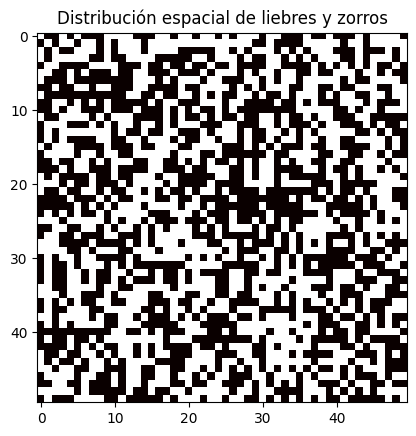

In [117]:
# Simulación
for step in range(n_steps):
    grid_liebres, grid_zorros = update(grid_liebres, grid_zorros)

# Visualización final
plt.imshow(grid_liebres + grid_zorros * 2, cmap='hot', interpolation='nearest')
plt.title("Distribución espacial de liebres y zorros")
plt.show()

###Visualización de la Dinámica

In [118]:
# Guardar estados para visualización
frames = []

for step in range(n_steps):
    grid_liebres, grid_zorros = update(grid_liebres, grid_zorros)
    if step % 10 == 0:  # Guardar cada 10 pasos
        frames.append(grid_liebres + grid_zorros * 2)

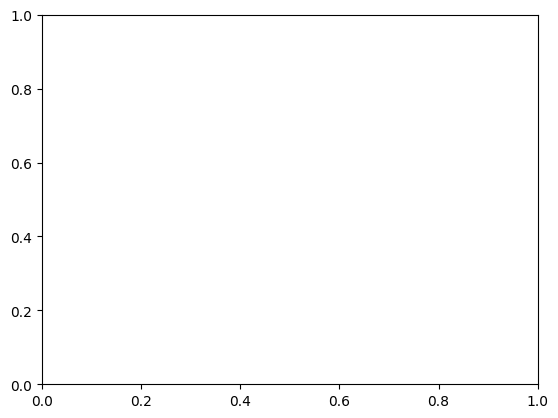

In [119]:
# Visualización dinámica
fig, ax = plt.subplots()

def update_plot(frame):
    ax.clear()
    ax.imshow(frame, cmap='hot', interpolation='nearest')
    ax.set_title("Distribución espacial de liebres y zorros")

ani = FuncAnimation(fig, update_plot, frames=frames, repeat=False)
plt.show()

# Mantener la referencia de la animación para evitar que se elimine
animation_ref = ani